# Analytical approach

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import egttools as egt

In [2]:
# Parameters for the pay-off matrix
## The reward values
R = 1
S = -1
T = 2
P = 0
## The values used to calculate the reward for a certain strategy
r = 50
Z = 100 # Population size
theta = 0.3 # trust threshold
p = 0.25 # Chance of checking
epsilon = 0.25 # opportunity cost
gamma = 1 # Importance of the game
# Parameters for the game settings
nb_strategies_with = 5
strategies = ["ALLC","ALLD","TFT","TUC","TUD"]
nb_strategies_without = 3
beta = 0.1 # intensity of selection

In [3]:
def calculate_pay_off(R,S,T,P,theta,p,epsilon,gamma):
    R *= gamma
    S *= gamma
    T *= gamma
    P *= gamma
    # static table
    ## Always cooperate (ALLC)
    ALLC_ALLC = R
    ALLC_ALLD = S
    ALLC_TFT = R
    ALLC_TUC = R
    ALLC_TUD = (theta*R+(r-theta)*S)/r
    ALLC = [ALLC_ALLC,ALLC_ALLD,ALLC_TFT,ALLC_TUC,ALLC_TUD]
    ## Always defect (ALLD)
    ALLD_ALLC = T
    ALLD_ALLD = P
    ALLD_TFT = (T+(r-1)*P)/r
    ALLD_TUC = (T+(r-1)*P)/r
    ALLD_TUD = (T+(r-1)*P)/r
    ALLD = [ALLD_ALLC,ALLD_ALLD,ALLD_TFT,ALLD_TUC,ALLD_TUD]
    ## Tit for Tat (TFT)
    TFT_ALLC = R-epsilon
    TFT_ALLD = (S+(r-1)*P)/r - epsilon
    TFT_TFT = R - epsilon
    TFT_TUD = R - epsilon
    TFT_TUC = (theta*R+S+(r-theta-1)*P)/r - epsilon
    TFT = [TFT_ALLC,TFT_ALLD,TFT_TFT,TFT_TUD,TFT_TUC]
    ## Trust-based Cooperate (TUC)
    TUC_ALLC = R - (theta*epsilon)/r - (p*(r-theta)*epsilon)/r
    TUC_ALLD = (S + (r-1)*P)/r - epsilon
    TUC_TFT = R-(theta*epsilon)/r-(p*(r-theta)*epsilon)/r
    TUC_TUC = R-(theta*epsilon)/r-(p*(r-theta)*epsilon)/r
    TUC_TUD = (theta*R-theta*epsilon)/r + 1/r*((S*(1-(1-p)**(r-theta)))/p + ((P-epsilon)*((1-p)**(r-theta)+(r-theta)*p - 1))/p)
    TUC = [TUC_ALLC,TUC_ALLD,TUC_TFT,TUC_TUC,TUC_TUD]
    ## Trust-based Defect (TUD)
    TUD_ALLC = (epsilon*R+(r-epsilon)*T-theta*epsilon)/r
    TUD_ALLD = (S+(r-1)*P)/r-epsilon
    TUD_TFT = (theta*R+T+(r-theta-1)*P-theta*epsilon)/r
    TUD_TUC = (theta*R-theta*epsilon)/r + 1/r*((T*(1 - (1 - p) ** (r - theta)))/p + (P*((1-p)**(r-theta) + (r - theta)*p - 1))/p)
    TUD_TUD = (theta*R+(r - theta) * P - theta*epsilon)/r
    TUD = [TUD_ALLC,TUD_ALLD,TUD_TFT,TUD_TUC,TUD_TUD]
    return np.array([
        ALLC,
        ALLD,
        TFT,
        TUC,
        TUD,])

In [4]:
pay_off = calculate_pay_off(R,S,T,P,theta,p,epsilon,gamma)
evolver = egt.analytical.StochDynamics(nb_strategies_with, pay_off, Z)
evolver.mu = 0
stationary_SML = evolver.calculate_stationary_distribution(beta)

In [5]:
print("time spent as Always Cooperate: {} & time spent as Always Cheat: {} & time spent as Tit for Tat: {} & time spent as Trust-based Cooperate {} & time spent as Trust-based Defect {}".format(*stationary_SML))

time spent as Always Cooperate: 0.043380057204576994 & time spent as Always Cheat: 0.2660268028094428 & time spent as Tit for Tat: 0.11762058717985252 & time spent as Trust-based Cooperate 0.418067599937874 & time spent as Trust-based Defect 0.1549049528682536


<BarContainer object of 5 artists>

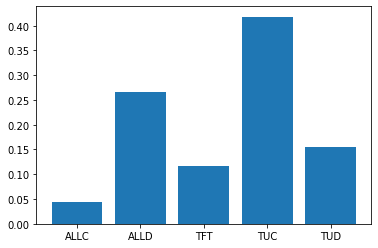

In [6]:
fig,ax = plt.subplots()
ax.bar(["ALLC","ALLD","TFT","TUC","TUD"],[*stationary_SML])

Text(0.5, 1.0, 'Influence of ε on frequency of cooperation')

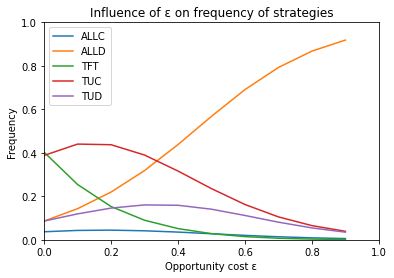

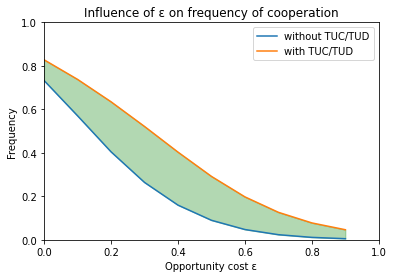

In [25]:
# for the frequencies of strategies
fig_strat,ax_strat = plt.subplots()
epsilons = np.arange(0,1,0.1)
results_with = np.zeros((nb_strategies_with,len(epsilons)))
# for the frequency of cooperation
fig_coop,ax_coop = plt.subplots()
results_without = np.zeros((nb_strategies_without,len(epsilons)))
for pos in range(len(epsilons)):
    # for all strategies
    epsilon = epsilons[pos]
    pay_off = calculate_pay_off(R,S,T,P,theta,p,epsilon,gamma)
    evolver = egt.analytical.StochDynamics(nb_strategies_with, pay_off, Z)
    evolver.mu = 0
    stationary_SML = evolver.calculate_stationary_distribution(beta)
    for strategy,v in zip(range(nb_strategies_with),stationary_SML):
        results_with[strategy][pos] = v
    # for all strategies except TUC and TUD
    epsilon = epsilons[pos]
    pay_off = calculate_pay_off(R,S,T,P,theta,p,epsilon,gamma)
    evolver = egt.analytical.StochDynamics(nb_strategies_without, pay_off, Z)
    evolver.mu = 0
    stationary_SML = evolver.calculate_stationary_distribution(beta)
    for strategy,v in zip(range(nb_strategies_without),stationary_SML):
        results_without[strategy][pos] = v
# for the frequencies of strategies
for pos in range(nb_strategies_with):
    ax_strat.plot(epsilons,results_with[pos],label = strategies[pos])
ax_strat.legend()
ax_strat.set_xlabel("Opportunity cost \u03B5")
ax_strat.set_ylabel("Frequency")
ax_strat.set_xlim(0,1)
ax_strat.set_ylim(0,1)
ax_strat.set_title("Influence of \u03B5 on frequency of strategies")
# for the frequency of cooperation
without_trust = np.array([results_without[0][pos] + results_without[2][pos] for pos in range(len(epsilons))])
with_trust = np.array([results_with[0][pos] + results_with[2][pos] + results_with[3][pos] for pos in range(len(epsilons))])
ax_coop.plot(epsilons,without_trust,label = "without TUC/TUD")
ax_coop.plot(epsilons,with_trust,label = "with TUC/TUD")
ax_coop.fill_between(epsilons, with_trust, without_trust, where=(with_trust > without_trust), color='green', alpha=0.3)
ax_coop.fill_between(epsilons, with_trust, without_trust, where=(with_trust < without_trust), color='red', alpha=0.3)

ax_coop.legend()
ax_coop.set_xlim(0,1)
ax_coop.set_ylim(0,1)
ax_coop.set_xlabel("Opportunity cost \u03B5")
ax_coop.set_ylabel("Frequency")
ax_coop.set_title("Influence of \u03B5 on frequency of cooperation")